<a href="https://colab.research.google.com/github/LeoBR01/Data_Science/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados
Ao analisar informações sobre o COVID-19, existe uma certa cautela visto que tais dados são coletados de fontes diferentes. Organizações internas de cada país, organizações globais tornam os dados dificeis de serem ditados com precisão.
Nesse contexto escolhi utilizar os dados da fonte 'Our World in Data' cuja o link do seu github: [Fonte](https://github.com/owid/covid-19-data/tree/master/public/data).


In [292]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
# importar o dataset COVID-19 para um DataFrame

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

## Análise Exploratória dos Dados

Iremos analisar como o COVID-19 se comportou nesses ultimos tempo no mundo e mais a frente para o Brasil. Tambem tentaremos entender como os dados conseguem reflitir a situação de melhora em relação a saude global e aos metodos de combate do virus.

Vale novamente que essa análise parte do meu ponto de visto sobre os dados coletados e que constantemente esses dados são atualizados podendo gerar discrepância nos resultados finais


Vamos começar a analise do nosso DataFrame

In [293]:
#Vamos entender observar as primeiras entradas do nossos dados para entendermos suas variáveis:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


#### Interessante observar que nesse primeiro momento nao temos muitas informações,nosso dataframe está em escala global e ainda possui analises preliminares que faremos para entender cada dado faltante.

In [294]:
#Vamos entender a dimensão do nosso dataframe
df.shape

print('Linhas:\t{}'.format(df.shape[0]))
print('Colunas:{}'.format(df.shape[1]))

# Aqui percebemos que temos 90109 linhas de dados e 59 Colunas

Linhas:	90109
Colunas:59


In [ ]:
#Conhecendo a quantidade de colunas, vamos analisar seus nomes:
df.columns

In [295]:
#verificar cada tipo das nossas variáveis é importante para conseguimos trabalhar de maneira efetiva com os dados:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

#### Ao analisar os tipos de variáveis, podemos perceber que nossas datas estão informadas como object, ou seja , uma string. Para trabalharmos de maneira mais efetiva com datas precisamos converte-las para o formato Datetime.


In [296]:
#convertendo nossas datas para formato Datetime
df.date = pd.to_datetime(df.date)

In [297]:
df.dtypes
#podemos observar agora que nossa date, está no formato correto

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

#### Vamos entender a dimensao dos valores ausentes no nosso Dataframe agora.

In [298]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

weekly_icu_admissions                    99.080003
weekly_icu_admissions_per_million        99.080003
weekly_hosp_admissions                   98.398606
weekly_hosp_admissions_per_million       98.398606
people_fully_vaccinated_per_hundred      90.710140
people_fully_vaccinated                  90.710140
icu_patients                             89.838973
icu_patients_per_million                 89.838973
new_vaccinations                         89.098758
people_vaccinated                        87.926844
people_vaccinated_per_hundred            87.926844
hosp_patients                            87.354204
hosp_patients_per_million                87.354204
total_vaccinations_per_hundred           87.066775
total_vaccinations                       87.066775
new_vaccinations_smoothed_per_million    78.209724
new_vaccinations_smoothed                78.209724
total_tests_per_thousand                 55.018922
total_tests                              55.018922
new_tests                      

#### Fica evidente que nossos dados faltantes tem uma grande proporção em certas colunas. Resta entender o motivo desses dados faltantes. E verificar a necessidade de preencher ou excluir tais lacunas.

Lembre-se de se atentar não para **quais** dados estão faltando, mas também o **motivo** deles estarem faltando.

In [ ]:
df.head()

In [299]:
#Vamos explorar mais afundo os dados:

#Encontrando a data mais recente que temos disponivel no dataframe
data = df.date.sort_values(ascending=False)[90108]
print(data)

#Verificando o total de casos para a data mais recente
df.loc[df.date == '2021-05-20'].sort_values(by="total_cases", ascending=False)

2021-05-20 00:00:00


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
88846,OWID_WRL,NaN,World,2021-05-20,165531431.0,628529.0,622183.286,3430326.0,12644.0,12249.286,21236.139,80.634,79.820,440.079,1.622,1.571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.590732e+09,739208299.0,376173766.0,29830346.0,26482926.0,20.41,9.48,4.83,3398.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737
4715,OWID_ASI,NaN,Asia,2021-05-20,48244404.0,346662.0,364038.143,630616.0,5688.0,5638.143,10397.843,74.714,78.459,135.913,1.226,1.215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.160402e+08,238713993.0,94126003.0,22108164.0,17706788.0,17.59,5.14,2.03,3816.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27629,OWID_EUR,NaN,Europe,2021-05-20,46645912.0,67466.0,72407.286,1059408.0,1716.0,1795.857,62304.199,90.113,96.713,1415.034,2.292,2.399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.099790e+08,211603061.0,99977115.0,3550244.0,4108385.0,41.40,28.26,13.35,5488.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59961,OWID_NAM,NaN,North America,2021-05-20,38552792.0,46958.0,44214.429,867877.0,1086.0,893.571,65115.018,79.311,74.677,1465.830,1.834,1.509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.337983e+08,202446851.0,141952086.0,2574612.0,2841917.0,56.38,34.19,23.98,4800.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85888,USA,North America,United States,2021-05-20,33056765.0,30141.0,29127.714,588539.0,665.0,552.143,99868.582,91.060,87.998,1778.049,2.009,1.668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.793972e+08,160177820.0,126605166.0,2107077.0,1828681.0,83.54,47.89,37.86,5468.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,ABW,North America,Aruba,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.792100e+04,58953.0,38968.0,1914.0,1783.0,91.72,55.22,36.50,16700.0,NaN,1.067660e+05,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
20517,CUW,North America,Curacao,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.353020e+05,81097.0,54205.0,2896.0,2820.0,82.45,49.42,33.03,17185.0,NaN,1.641000e+05,362.644,41.7,16.367,10.068,NaN,NaN,NaN,11.62,NaN,NaN,NaN,NaN,78.88,NaN
33751,GGY,Europe,Guernsey,2021-05-20,NaN,NaN,NaN,NaN,NaN

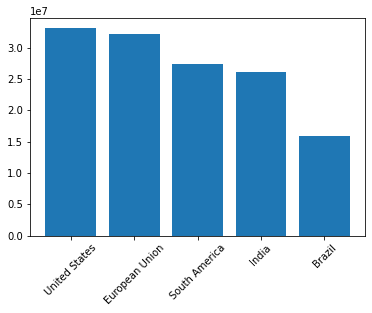

In [300]:
#Os 5 paises com maior quantidade de casos de acordo com o DataFrame estudado
total_cases_top_5 = df.loc[df.date == '2021-05-20',['location','total_cases']].sort_values(by="total_cases", ascending=False)[4:9].reset_index(drop=True)

fig,ax = plt.subplots()
ax.bar('location','total_cases',data = total_cases_top_5,)
plt.xticks(rotation=45)
plt.show()

#### Com essas informações podemos observar que os Estados Unidos teve um número de casos maior que a União Europeia inteira.


In [ ]:
df.loc[df.date == '2021-05-20'].sort_values(by='total_deaths',ascending=False)

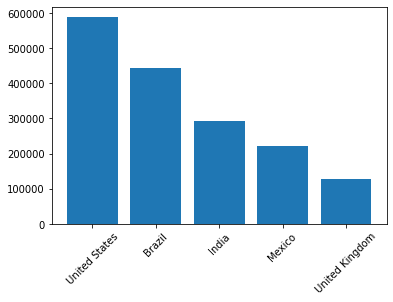

In [302]:
#Os 5 paises com maior quantidade de mortes de acordo com o DataFrame estudado

total_deaths_top_5 = df.loc[df.date == '2021-05-20',['location','total_deaths']].sort_values(by="total_deaths", ascending=False)[6:11].reset_index(drop=True)

fig,ax = plt.subplots()
ax.bar('location','total_deaths',data = total_deaths_top_5,)
plt.xticks(rotation=45)
plt.show()

#### Interessante observar com essa analise gráfica que certos paises tiverem menos casos confirmados no total, mas a quantidade de mortes maior. Por exemplo, o méxico que teve um total de 2390140 casos, mas teve um total de morte maior que paises com uma quantidade muito superior de casos.

#### Existem algumas interpretações:

##### Ou os dados foram mal informados, ou a questão da saúde preventiva do méxico não estava preparada para assumir tais riscos.

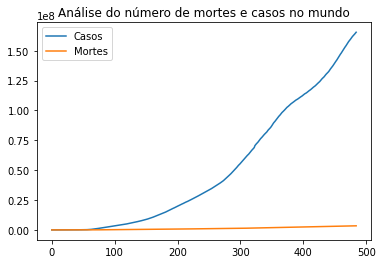

In [303]:
#gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.

casos_mundo = df.loc[df.location == 'World','total_cases'].reset_index(drop=True).plot(label = 'Casos')
mortes_mundo = df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(label = 'Mortes')
plt.legend()
plt.title('Análise do número de mortes e casos no mundo')
plt.show()

### Análise Exploratória para o Brasil

In [304]:
#Criando um copia do nosso dataframe e retirando a parte que se refere ao Brasil
df_brasil = df.loc[df.location == 'Brazil'].copy()
#Mostrando nosso dataframe
df_brasil

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11491,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11492,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11493,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11494,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11495,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,BRA,South America,Brazil,2021-05-16,15627243.0,40709.0,63207.571,435751.0,1036.0,1915.857,73519.413,191.518,297.364,2050.020,4.874,9.013,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52771668.0,35801333.0,16970335.0,130085.0,795659.0,24.83,16.84,7.98,3743.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11937,BRA,South America,Brazil,2021-05-17,15657391.0,30148.0,63914.429,436537.0,786.0,1901.143,73661.246,141.833,300.690,2053.718,3.698,8.944,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53624328.0,36355939.0,17268389.0,852660.0,894140.0,25.23,17.10,8.12,4207.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
11938,BRA,South America,Brazil,2021-05-18,15732836.0,75445.0,64304.429,439050.0,2513.0,1930.000,74016.182,354.936,302.524,2065.540,11.823,9.080,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54332240.0,36844286.0,17487954.0,707912.0,876967.0,25.56,17.33,8.23,4126.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103

In [305]:
# Observando quando ocorreu o primeiro obito decorrente da COVID-19 no Brasil
df_brasil[['date','total_deaths']].dropna()

,date,total_deaths
11511,2020-03-17,1.0
11512,2020-03-18,3.0
11513,2020-03-19,6.0
11514,2020-03-20,11.0
11515,2020-03-21,15.0
...,...,...
11936,2021-05-16,435751.0
11937,2021-05-17,436537.0
11938,2021-05-18,439050.0
11939,2021-05-19,441691.0


In [306]:
#O primeiro caso registrado no Brasil
df_brasil[['date','total_cases']].dropna()

,date,total_cases
11491,2020-02-26,1.0
11492,2020-02-27,1.0
11493,2020-02-28,1.0
11494,2020-02-29,2.0
11495,2020-03-01,2.0
...,...,...
11936,2021-05-16,15627243.0
11937,2021-05-17,15657391.0
11938,2021-05-18,15732836.0
11939,2021-05-19,15812055.0


#### Podemos notar que a primeira morte no Brasil foi no dia 17/03/2020
#### O primeiro caso registrado no Brasil foi datado no dia: 26/02/2020 
#### Ou seja, tivemos um espaçamento de 19 dias até identificarmos a primeira morte registrada por COVID-19.

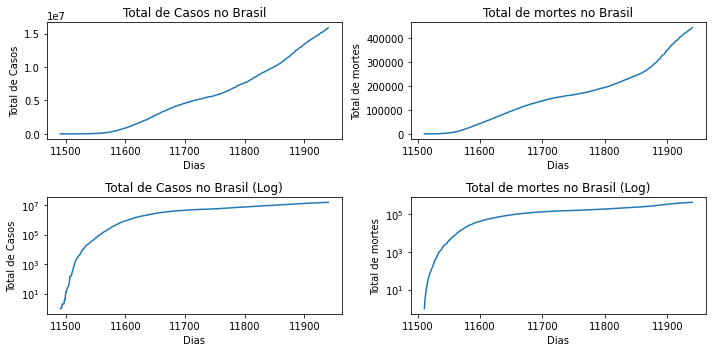

In [307]:
#Grafico retratando total de morte e de casos no Brasil:

fig,ax = plt.subplots(nrows=2,ncols=2,figsize= (10,5))

ax[0][0].plot('total_cases',data = df_brasil)
ax[0][0].set_title('Total de Casos no Brasil')
ax[0][0].set_ylabel('Total de Casos')
ax[0][0].set_xlabel('Dias')

ax[0][1].plot('total_deaths',data = df_brasil)
ax[0][1].set_title('Total de mortes no Brasil')
ax[0][1].set_ylabel('Total de mortes')
ax[0][1].set_xlabel('Dias')


# Em escala logarítmica
ax[1][0].plot('total_cases',data = df_brasil)
ax[1][0].set_title('Total de Casos no Brasil (Log)')
ax[1][0].set_ylabel('Total de Casos')
ax[1][0].set_xlabel('Dias')
ax[1][0].set_yscale('log')

ax[1][1].plot('total_deaths',data = df_brasil)
ax[1][1].set_title('Total de mortes no Brasil (Log)')
ax[1][1].set_ylabel('Total de mortes')
ax[1][1].set_xlabel('Dias')
ax[1][1].set_yscale('log')

plt.tight_layout()



Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.



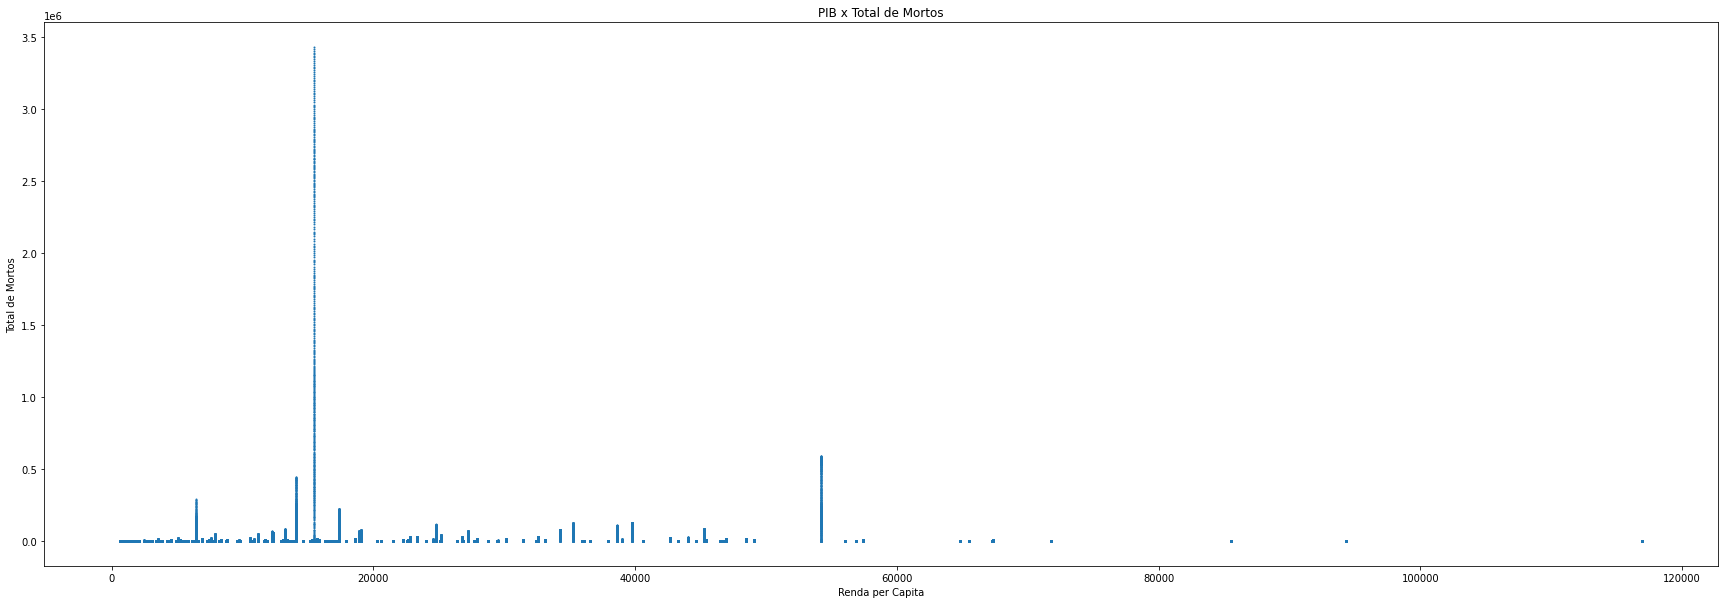

In [308]:
fig,ax = plt.subplots(figsize=(30,10))
df.plot.scatter(x='gdp_per_capita',y='total_deaths',ax=ax ,s=1)
ax.set_title('PIB x Total de Mortos')
ax.set_xlabel('Renda per Capita')
ax.set_ylabel('Total de Mortos')
plt.show()

## Conclusão

Podemos estudar nesse dataframe como o COVID-19 se espalhou pelos paises, coletando as informações do número de casos confirmados, de total de mortes.

Entendemos tambem que certos países por conta da sua situação financeira, apesar de possuirem menos casos confirmados, tiveram maior expressividade na quantidade de mortes, refletindo uma precariedade na questão de saúde pública.

Análisamos alguns dados no Brasil para verificarmos a quantidade de casos e como eles foram convertidos em óbitos.

E por fim podemos identificar um gráfico que correlacionou a quantidade de mortes com países de renda menor. O que não reflete com exatidão a relação de mortes por renda, mas nos da uma ideia maior sobre a situação.